In [1]:
from sympy import *

In [2]:
#general purpose code for interior cases

theta1=Symbol('\\theta_1')
theta2 =Symbol('\\theta_2')
lamb =Symbol('\lambda')
ell =Symbol('\ell')
mu1 =Symbol('\mu_1')
mu2 =Symbol('\mu_2')

def profit(theta1,theta2, mu1, mu2, lamb):
    return ((3*lamb)+ mu2*theta2 - mu1*theta1)**2/(18*lamb)

def t(theta1, theta2, mu1, mu2, lamb):
    return (3*lamb + mu2*theta2 - mu1*theta1)/(6*lamb)

#analyze symmetric simultaneous case first
def nb_objective(theta1,theta2, mu1, mu2, lamb, ell):
    term1 = (profit(theta1,theta2, mu1, mu2, lamb))
    term2 = ( mu2*theta2 + (mu1*theta1- mu2*theta2)*t(theta1, theta2, mu1, mu2,lamb))
    return term1*term2

In [3]:
print nb_objective(theta1,theta2, mu1, mu2, lamb, ell)

(\mu_2*\theta_2 + (\mu_1*\theta_1 - \mu_2*\theta_2)*(3*\lambda - \mu_1*\theta_1 + \mu_2*\theta_2)/(6*\lambda))*(3*\lambda - \mu_1*\theta_1 + \mu_2*\theta_2)**2/(18*\lambda)


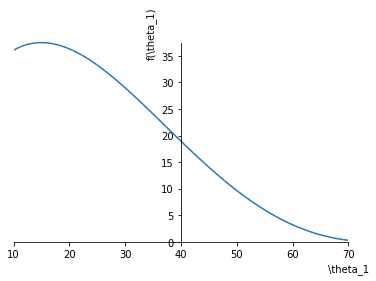

In [5]:
plot(nb_objective(theta1,1.5*10, .5, .5, 10, 70), (theta1,10,70))

In [6]:
foc =  diff(nb_objective(theta1,theta2, mu1, mu2, lamb, ell), theta1)
print simplify(12*6*3*foc.subs({mu1:.5, mu2:.5}))

(3*\lambda - 0.5*\theta_1 + 0.5*\theta_2)*(-6.0*\lambda*\theta_2 - 1.0*(\theta_1 - \theta_2)*(3*\lambda - 0.5*\theta_1 + 0.5*\theta_2) + (3.0*\lambda - 1.0*\theta_1 + \theta_2)*(3*\lambda - 0.5*\theta_1 + 0.5*\theta_2))/\lambda**2


In [7]:
mult_sol = simplify(solve(foc.subs({mu1:.5, mu2:.5}),theta1))
for sol in mult_sol:
    print simplify(nb_objective(sol,theta2, .5, .5, lamb, ell))
    print '------'
    
#### only solution index 1 is the correct maximum....

0
------
0.03955078125*\lambda**2 + 0.0703125*\lambda*\theta_2 + 0.00761155140044917*\lambda*sqrt(\lambda*(27.0*\lambda + 32.0*\theta_2)) + 0.0208333333333333*\theta_2**2 + 0.0090210979560879*\theta_2*sqrt(\lambda*(27.0*\lambda + 32.0*\theta_2))
------
0.03955078125*\lambda**2 + 0.0703125*\lambda*\theta_2 - 0.00761155140044917*\lambda*sqrt(\lambda*(27.0*\lambda + 32.0*\theta_2)) + 0.0208333333333333*\theta_2**2 - 0.0090210979560879*\theta_2*sqrt(\lambda*(27.0*\lambda + 32.0*\theta_2))
------


---------------
case: 6.0*\lambda + \theta_2
---------------


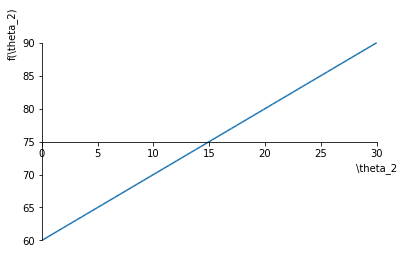

symmetric solution? 7.5*\lambda
---------------
case: 3.75*\lambda + \theta_2 - 0.433012701892219*sqrt(27.0*\lambda**2 + 32.0*\lambda*\theta_2)
---------------


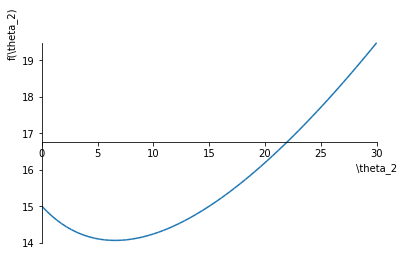

symmetric solution? 5.25*\lambda - 3.75*sqrt(\lambda**2)
---------------
case: 3.75*\lambda + \theta_2 + 0.433012701892219*sqrt(27.0*\lambda**2 + 32.0*\lambda*\theta_2)
---------------


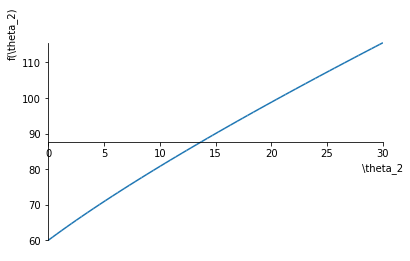

symmetric solution? 5.25*\lambda + 3.75*sqrt(\lambda**2)


In [7]:
foc =  diff(nb_objective(theta1,theta2, .5, .5, lamb, ell), theta1)
mult_sol = simplify(solve(foc,theta1))
outside = 1.5*lamb
for sol in mult_sol:
    print '---------------'
    print 'case: %s\n'%sol,
    print '---------------'
    plot(sol.subs({lamb:10}),(theta2,0,30))
    print 'symmetric solution? %s'%simplify(sol.subs({theta2:1.5*lamb}))

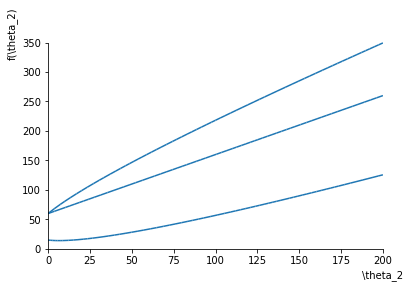

In [8]:
a = 10
plot(mult_sol[0].subs({lamb:a}),mult_sol[1].subs({lamb:a}),mult_sol[2].subs({lamb:a}),(theta2,0,200))

-----


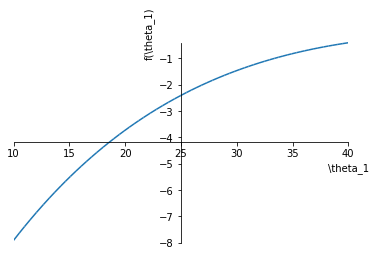

In [52]:
mult_sol = solve(foc.subs({mu1:.5, mu2:.5}),theta2)
foc =  diff(nb_objective(theta1,theta2, .5, .5, lamb, ell), theta2)
a = 10
b = 70

h = mult_sol[1]
print '-----'
obj = nb_objective(theta1, simplify(h), .5, .5,lamb,ell)
obj = obj.subs({lamb:a, ell:b})
plot(obj,(theta1,10,40))

second order deriv :1.0*(46080.0*\theta_1**2 - 22447.3784660927*\theta_1*sqrt(320.0*\theta_1 - 4500.0) - 1296000.0*\theta_1 + 544816.58152079*sqrt(320.0*\theta_1 - 4500.0) + 9112500.0)/(5120.0*\theta_1**2 - 144000.0*\theta_1 + 1012500.0)


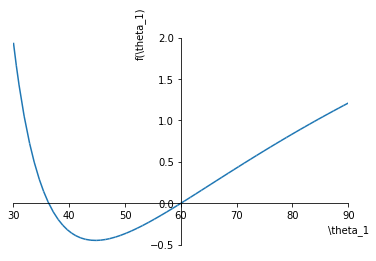

In [38]:
foc =  diff(nb_objective(theta1,theta2, .5, .5, lamb, ell), theta1)
h = solve(foc,theta2)
a = 10

stage1_obj = diff(nb_objective(theta1,simplify(h[1]), .5, .5, lamb, ell), theta1)

second_order_deriv = simplify(12*3*6*diff(stage1_obj, theta1).subs({lamb:a}))
print 'second order deriv :%s'%second_order_deriv
plot(second_order_deriv, (theta1, 3*a,a*9))

In [ ]:
stage1_sol = solve(stage1_obj,theta1)

for sol in stage1_sol:
    print 'stage1 sol :%s '%sol
    
    response = (h[1]).subs({theta1:sol})
    plot(nb_objective(sol,response, .5, .5, lamb, b))
    print 'response: %s '%response
    plot(stage1_sol[0],response,(lamb,a,b))